In [15]:
!pip freeze > requirements.txt

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

In [2]:
df = pd.read_csv("fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
#assigning values to features as X and target as y
import pickle
X=df.drop(["fetal_health"],axis=1)
y=df["fetal_health"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)


filename = 'scaler.sav'
pickle.dump(s_scaler, open(filename, 'wb'))

In [6]:
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

In [7]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
cv_score = cross_val_score(rf, X_train,y_train, cv=10 )
cv_score.mean()

0.9402049700707419

In [9]:
pred_rfc = rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.9435736677115988


In [42]:
parameters = {
    'n_estimators': [100,150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [8,12,16],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

#Fitting the trainingset to find parameters with best accuracy

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5)
CV_rfc.fit(X_train, y_train)

#Getting the outcome of gridsearch

CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'n_jobs': -1}

In [10]:
rf_best = RandomForestClassifier(criterion= 'entropy',
 max_depth= 16,
 max_features= 'sqrt',
 n_estimators= 100,
 n_jobs= -1)
rf_best.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, n_jobs=-1)

In [11]:
cv_score1 = cross_val_score(rf_best, X_train,y_train, cv=10 )
cv_score1.mean()

0.93819154725195

In [12]:
pred_rfc = rf_best.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.9435736677115988


In [46]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(rf_best, open(filename, 'wb'))

[0.04613788 0.07157525 0.02235452 0.0386133  0.00967241 0.00069412
 0.05315955 0.13346298 0.10350164 0.09351887 0.04541873 0.0342753
 0.03406189 0.0289835  0.01757823 0.00356018 0.06051515 0.1090233
 0.05470632 0.03317516 0.00601174]


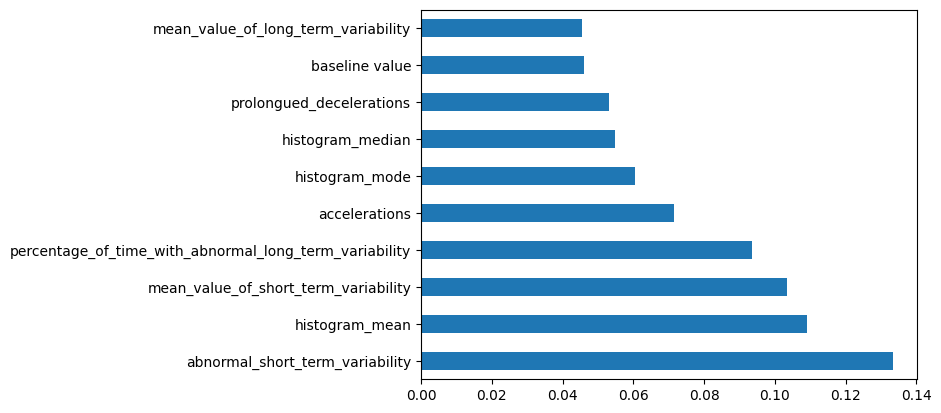

In [14]:
print(rf_best.feature_importances_)
feat_importances = pd.Series(rf_best.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

C:\Users\Moham\AppData\Local\Temp\ipykernel_1988\186243382.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  temp_df = df['fetal_health'].replace({1: "Normal", 2: "Suspect", 3: "Pathological"}).to_frame()


fetal_health
Normal          1655
Suspect          295
Pathological     176
Name: count, dtype: int64


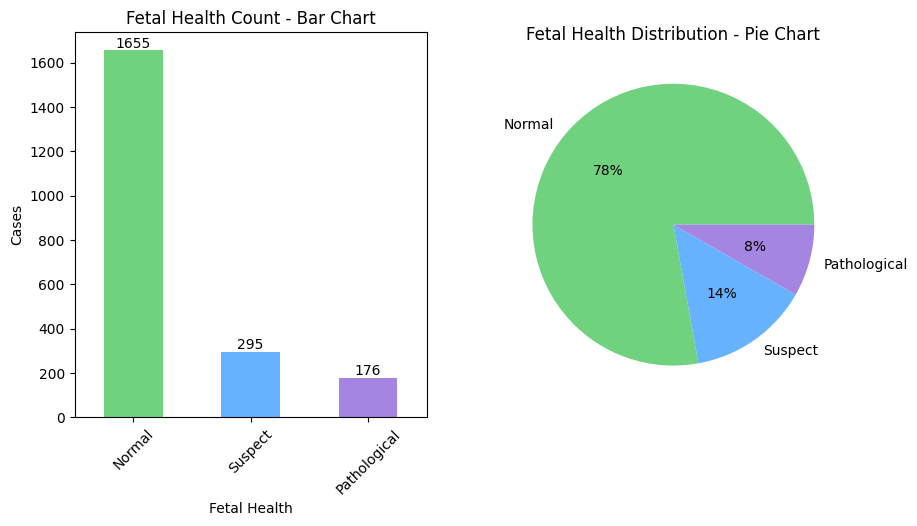

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a temporary DataFrame with replaced values
temp_df = df['fetal_health'].replace({1: "Normal", 2: "Suspect", 3: "Pathological"}).to_frame()

# Count the occurrences of each category
fetal_counts = temp_df["fetal_health"].value_counts()
print(fetal_counts)

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# First subplot for the bar chart
plt.subplot(121)
bar_plot = fetal_counts.plot(kind="bar", color=["#70D17F","#66B2FF", "#A485E2"])
plt.title("Fetal Health Count - Bar Chart")
plt.xlabel("Fetal Health")
plt.ylabel("Cases")
plt.xticks(rotation=45)

# Annotate the bars with their respective counts
for index, value in enumerate(fetal_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Second subplot for the pie chart
plt.subplot(122)
# Calculate the count of each category again
normal = fetal_counts.get("Normal", 0)
suspect = fetal_counts.get("Suspect", 0)
pathological = fetal_counts.get("Pathological", 0)

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors=["#70D17F","#66B2FF", "#A485E2"], autopct="%1.0f%%")
plt.title("Fetal Health Distribution - Pie Chart")
plt.savefig('eda1.png',bbox_inches='tight')
# Show the plot
plt.show()


C:\Users\Moham\AppData\Local\Temp\ipykernel_1988\1798649834.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x="baseline value", hue="fetal_health", alpha=0.3, shade=True, ax=ax, palette=["#28A745","#007BFF", "#6F42C1"])


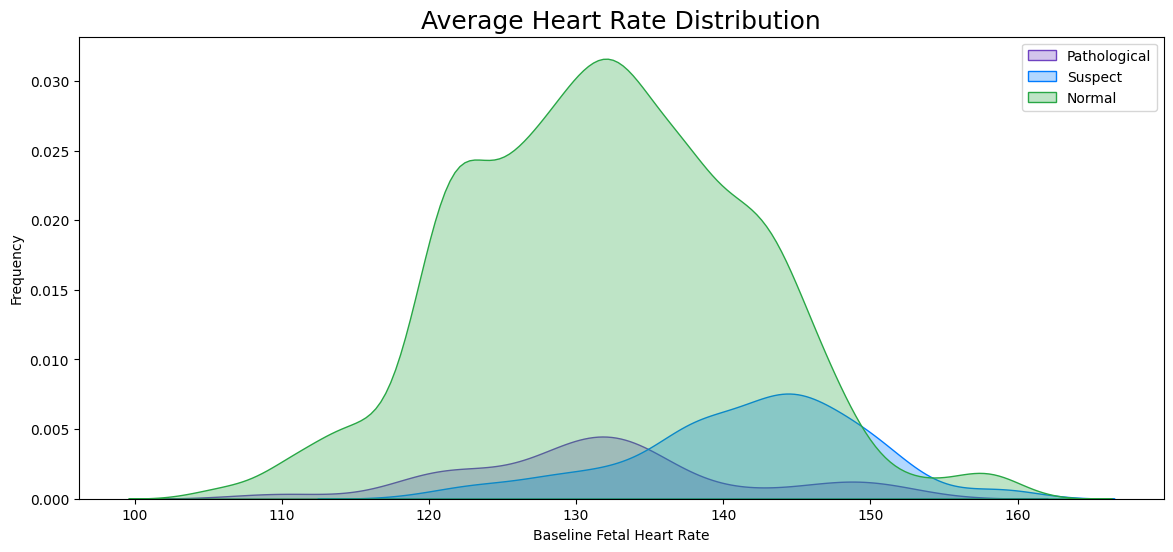

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'fetal_health' is treated as a categorical variable
df['fetal_health'] = df['fetal_health'].astype('category')

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(data=df, x="baseline value", hue="fetal_health", alpha=0.3, shade=True, ax=ax, palette=["#28A745","#007BFF", "#6F42C1"])
plt.title('Average Heart Rate Distribution', fontsize=18)
ax.set_xlabel("Baseline Fetal Heart Rate")
ax.set_ylabel("Frequency")
ax.legend(['Pathological', 'Suspect', 'Normal'])
plt.savefig('eda3.png')
plt.show()

C:\Users\Moham\AppData\Local\Temp\ipykernel_1988\4229431078.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Importance', y = 'Features', data = important_features, palette=["#28A745", "#007BFF", "#6F42C1"])
C:\Users\Moham\AppData\Local\Temp\ipykernel_1988\4229431078.py:8: UserWarning: 
The palette list has fewer values (3) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'Importance', y = 'Features', data = important_features, palette=["#28A745", "#007BFF", "#6F42C1"])


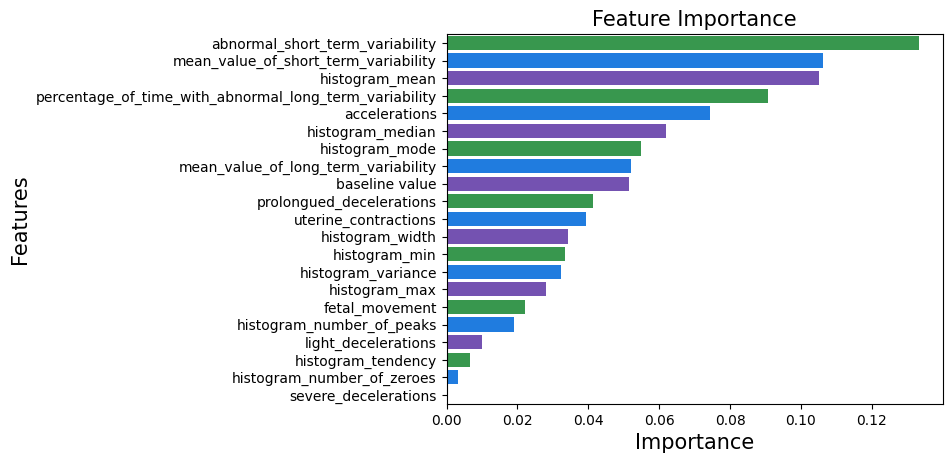

                                             Features  Importance
7                     abnormal_short_term_variability    0.133276
8                mean_value_of_short_term_variability    0.106131
17                                     histogram_mean    0.105099
9   percentage_of_time_with_abnormal_long_term_var...    0.090748
1                                       accelerations    0.074207
18                                   histogram_median    0.061908
16                                     histogram_mode    0.054926
10                mean_value_of_long_term_variability    0.052113
0                                      baseline value    0.051463
6                            prolongued_decelerations    0.041224
3                                uterine_contractions    0.039346
11                                    histogram_width    0.034186
12                                      histogram_min    0.033359
19                                 histogram_variance    0.032274
13        

In [68]:
important_features = pd.DataFrame({'Features': X.columns,
                                   'Importance': rf_best.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features, palette=["#28A745", "#007BFF", "#6F42C1"])

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.savefig('results4.png',bbox_inches='tight')
# display the plot
plt.show()
print(important_features)

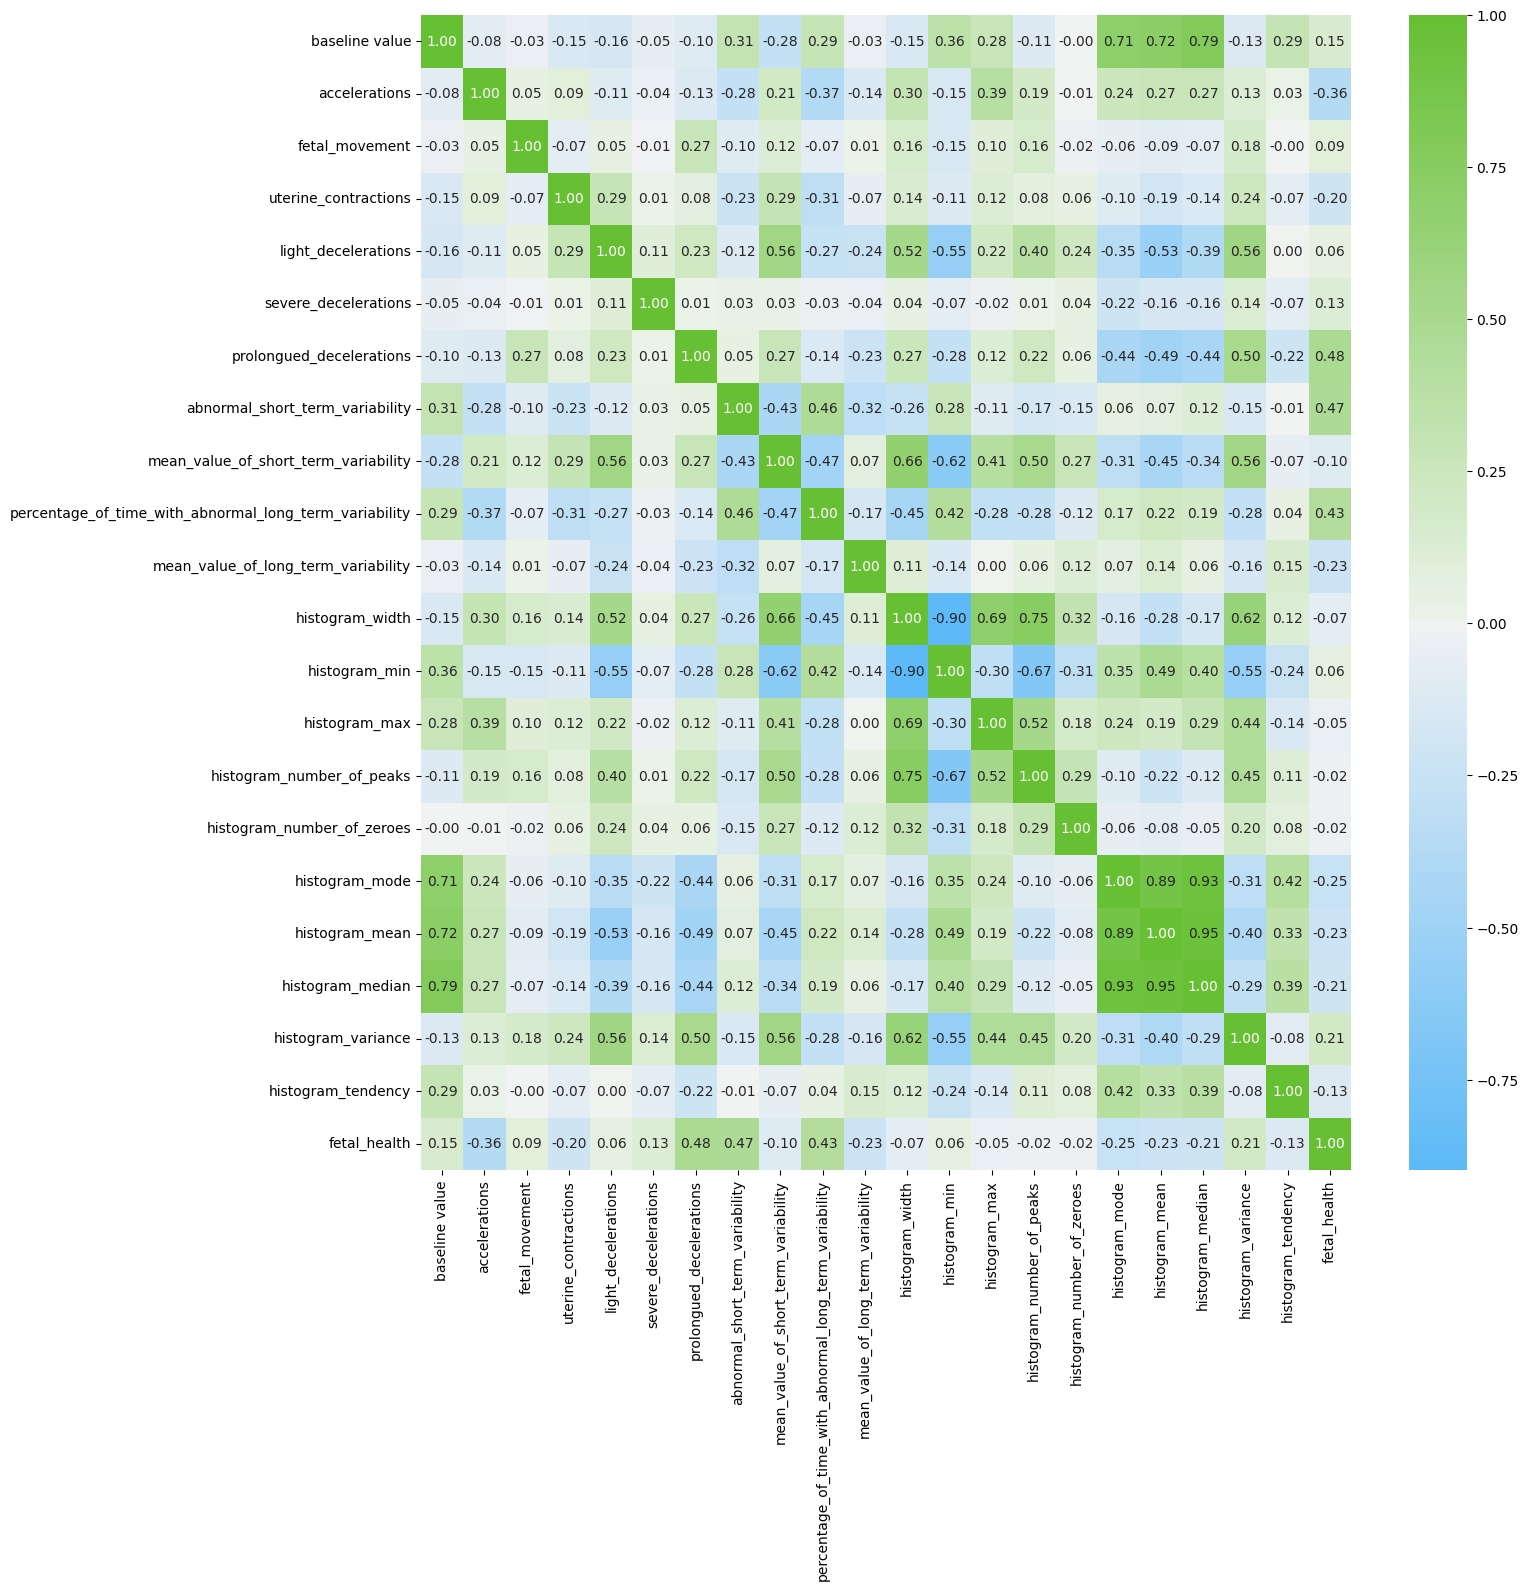

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
corrmat = df.corr()

# Set the figure size
plt.figure(figsize=(15,15))

# Create a custom diverging colormap, using brighter colors by increasing saturation
cmap = sns.diverging_palette(240, 120, s=90, l=70, n=11, center="light", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0, fmt=".2f")
plt.savefig('eda5.png',bbox_inches='tight')
# Show the plot
plt.show()


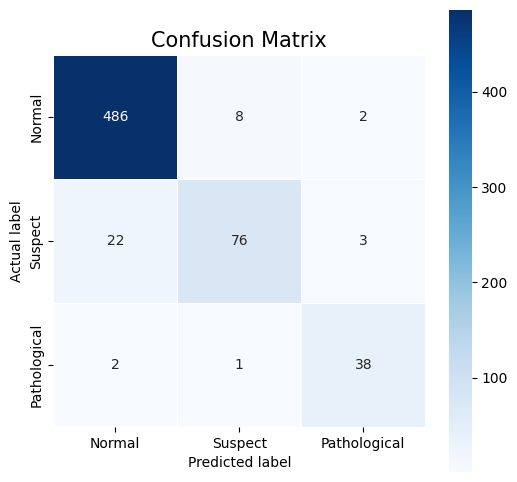

In [55]:
class_labels = ['Normal', 'Suspect', 'Pathological']

cm = confusion_matrix(y_test, pred_rfc)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues')

plt.xticks(ticks=[0.5, 1.5, 2.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=class_labels)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size=15)
plt.savefig('results1.png')
plt.show()

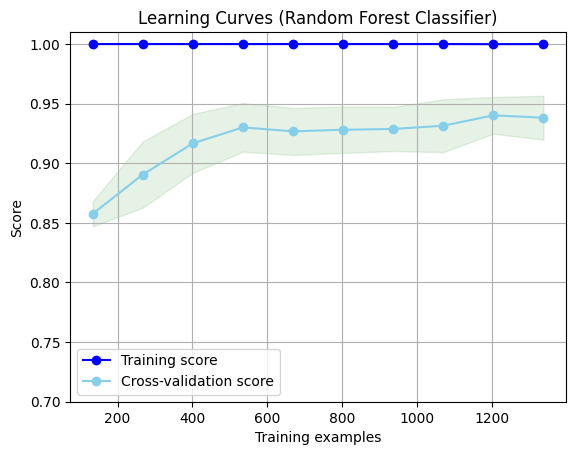

In [56]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="skyblue",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plotting learning curve
title = "Learning Curves (Random Forest Classifier)"
plot_learning_curve(rf_best, title, X_train, y_train, ylim=(0.7, 1.01), cv=10, n_jobs=-1)
plt.savefig('results2.png')
plt.show()

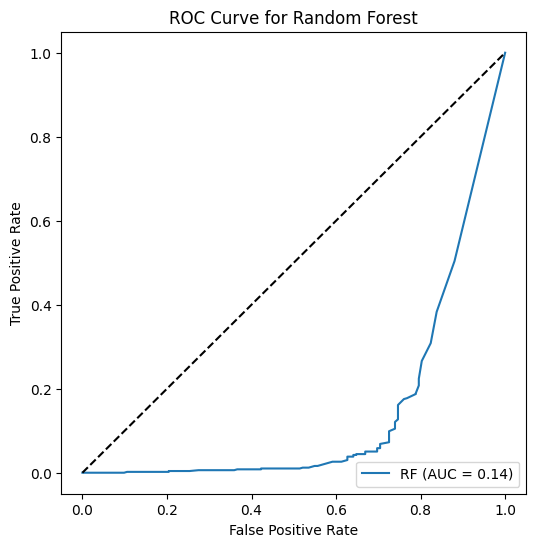

In [57]:
# Visualize the ROC Curve for SVM
svm_y_prob = rf_best.predict_proba(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, svm_y_prob[:, 1], pos_label=1)
auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(6, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.savefig('results3.png')
plt.show()

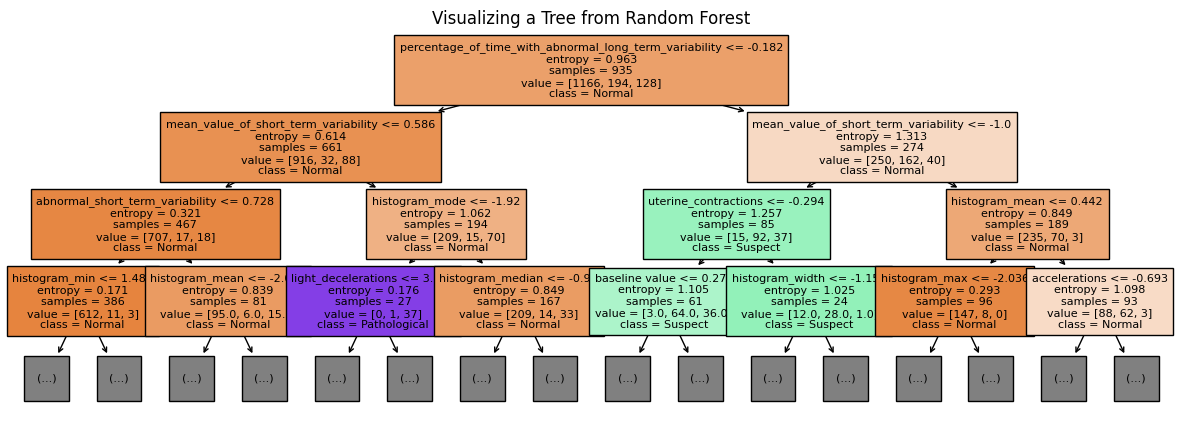

In [84]:
# Example placeholders for feature and target names
feature_names = df.columns[:-1]  # Assuming all columns but the last are features
target_names = ['Normal', 'Suspect', 'Pathological']  # Adjust these names based on your dataset

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming rf_model is your Random Forest model
# Extract one of the trees from the Random Forest
tree = rf_best.estimators_[0]

# Plot the tree
plt.figure(figsize=(15,5))
plot_tree(tree, filled=True, feature_names=feature_names, class_names=target_names, max_depth=3, fontsize=8)
plt.title('Visualizing a Tree from Random Forest')
plt.savefig('eda6.png',bbox_inches='tight')
plt.show()
